# Milestones Challange 1

NAMA    = ALIF NURHADI <br>
BATCH   = HCK-019 <br>

Objektif = Melakukan analisa penjualan sepeda beserta item-item pendukungnya pada suatu negara untuk memberikan insight eksekutif perusahaan sepeda.

Audience = eksekutif perusahaan sepeda.

link tableau : https://public.tableau.com/app/profile/alif.nurhadi/viz/HCK019alif/Milestones?publish=yes

# 1. Latar permasalahan :<br>
Di tengah era urbanisasi yang pesat, kota-kota besar di Amerika Serikat menghadapi tantangan serius terkait polusi udara, dan gaya hidup tidak sehat. Perusahaan sepeda dan yang berkaitan dengan hal tersebut memiliki potensi besar untuk berkontribusi pada solusi masalah ini mengembangkan bisnisnya.

## 1.a. SMART : <br>

Spesifik: <br>
- mengetahui top produk pada produk kategori bikes atau aksesoris yang berpotensi meningkatkan revenue bisnis untuk lebih difokuskan.
- Meningkatkan jumlah order dan menaikkan revenue pada kategori bikes dan accesorisnya.

Measurable: <br>
- mengetahui 3 jenis produk dari tiap kategori yang memiliki penjualan atau revenue paling menarik dan berpontesi untuk dikembangkan.
- menaikan revenue produk kategori bikes dan aksesorisnya sebesar 10%.

Achievable: <br>
- mepusatkan proses pemasaran pada top produk pada kategori produk bikes dan aksesoris.
- memperkecil cost of lead-nya,
- melakukan analisa korelasi pada kolom yang berkaitan ( demografi , produk, revenue , jumlah order ) 

Relevan: <br>
- Dengan melakukan analisis pada data yang tersedia dapat menghasilkan rekomendasi produk teratas dari tiap kategori produk bikes and akesorisnya dan memperkecil CostOfLead pada produk teratas di tiap kategorinya dapat meningkatkan penjualan dan jumlah ordernya.

Time-bound: <br>
- Menyelesaikan analisis dan menyajikan temuan dalam waktu dua minggu,dengan rekomendasi yang dapat diimplementasikan dalam tiga bulan ke depan.

## 1.b. Problem Statement :<br>

Untuk meningkatkan penjualan dan pendapatan sepeda dan aksesoris dengan mengidentifikasi tiga produk teratas di setiap kategori yang memiliki potensi pertumbuhan tertinggi dan memusatkan strategi pemasaran pada produk-produk ini. Tujuannya adalah untuk mencapai peningkatan pendapatan sebesar 10% sambil mengurangi biaya akuisisi prospek dengan memanfaatkan wawasan data tentang kinerja produk dan korelasi demografi. Analisis ini harus diselesaikan dalam dua minggu, dengan rekomendasi yang diimplementasikan dalam tiga bulan ke depan.

## 1.c. Problem Breakdown : <br>

- bagaimana pemusatan data pada tiap revenue dan umurnya produk berdasarkan kategori. (deskriptif)
- bagaimana relasi antara jumlah revenue(uang yang dikeluarkan konsumen) dengan umur pembelinya. (deskriptif)
- revenue order quantity akan naik berdasarkan gender pembelinya. (inferensial)
- bagaimana trend penjualan dalam 5 tahun . ( line-chart )
- seberapa besar porsi cowo dalam keseluruhan penjualan produk. ( pie-chart )
- produk apa saja yang paling populer di negara bagian berdasarkan revenuenya. ( top bar-chart)
- berapa besar revenue tiap categorynya.( top bar-chart)



# 2. Melakukan Loading Data

In [160]:
# import library yang dibutuhkan

import pandas as pd     # untuk kebutuhan dataframe
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [161]:
df = pd.read_csv('bike_sales.csv')
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


## 2.a. Data Cleaning

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

### 2.a.a Melakukan Cleaning pada kolom yang redundant dalam analisis

In [163]:
df1 = df

df1 = df[['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Revenue',]]
df1 = df1.drop(columns='Date')
df1.sample(3)

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Revenue
27646,23,April,2014,41,Adults (35-64),F,Canada,British Columbia,Clothing,Gloves,"Half-Finger Gloves, S",16,9,24,380
19192,13,March,2014,40,Adults (35-64),F,Germany,Hessen,Clothing,Caps,AWC Logo Cap,11,7,9,92
60290,4,February,2013,32,Young Adults (25-34),F,United States,California,Bikes,Road Bikes,"Road-650 Red, 62",1,487,783,767


### 2.a.b Melakukan filterisasi kolom agar lebih spesifik pada satu negara

In [164]:
df_usa= df1[(df1['Country'] == 'United States')&(df1['Product_Category'] != 'Clothing')]
df_usa = df_usa.reset_index(drop=True)
df_usa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33070 entries, 0 to 33069
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Day               33070 non-null  int64 
 1   Month             33070 non-null  object
 2   Year              33070 non-null  int64 
 3   Customer_Age      33070 non-null  int64 
 4   Age_Group         33070 non-null  object
 5   Customer_Gender   33070 non-null  object
 6   Country           33070 non-null  object
 7   State             33070 non-null  object
 8   Product_Category  33070 non-null  object
 9   Sub_Category      33070 non-null  object
 10  Product           33070 non-null  object
 11  Order_Quantity    33070 non-null  int64 
 12  Unit_Cost         33070 non-null  int64 
 13  Unit_Price        33070 non-null  int64 
 14  Revenue           33070 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.8+ MB


In [165]:
df_usa[df_usa.duplicated()]
df_usa = df_usa.drop_duplicates(keep='last')
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32706 entries, 0 to 33069
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Day               32706 non-null  int64 
 1   Month             32706 non-null  object
 2   Year              32706 non-null  int64 
 3   Customer_Age      32706 non-null  int64 
 4   Age_Group         32706 non-null  object
 5   Customer_Gender   32706 non-null  object
 6   Country           32706 non-null  object
 7   State             32706 non-null  object
 8   Product_Category  32706 non-null  object
 9   Sub_Category      32706 non-null  object
 10  Product           32706 non-null  object
 11  Order_Quantity    32706 non-null  int64 
 12  Unit_Cost         32706 non-null  int64 
 13  Unit_Price        32706 non-null  int64 
 14  Revenue           32706 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


Setelah melakukan loading data, dan setelah dianalisa awal terdapat : 
- kolom yang cukup redundant yaitu kolom date. Untuk alasan mempermudah proses filterisasi maka kolom tersebut akan didrop dan akan menggunakan kolom `Year` atau `Month` atau `Day` untuk proses filterisasi waktu. 
- tidak terdapat nilai null pada 18 kolom yang tersedia.

dari data awal yang terlalu luas cakupannya, saya mempersempitnya untuk pada salah satu negara yang memiliki daya-beli paling kuat dibanding negara lain yang ada pada kolom country pada data awal yaitu united states.<br>
Ada sekitar lebih dari 300 baris yang terduplikasi dari keseluruhan data yang harus didrop atau diatasi, itu alasan mengapa ada proses pembuangan baris terduplikasi dengan menyisakan satu dari data terduplikasinya.<br>

# 3. Analisa 

## 3.a. bagaimana pemusatan data dan dispersi pada tiap kategori produk berdasarkan revenue dan umurnya?

### 3.a.a. Menghitung Central Tendency of Data

Mengetahui nilai rataan revenue dari tiap kategorinya

In [166]:
meann = ['Customer_Age','Revenue']

for me in meann:
    mann = df_usa.groupby("Product_Category")[me].mean()
    manstd = df_usa.groupby("Product_Category")[me].std()
    print(f'''\n nilai mean {me} berdasarkan Product-categorynya adalah \n {mann} 
          \n deviasinya {me} berdasarkan Product-categorynya adalah \n {manstd}''')


 nilai mean Customer_Age berdasarkan Product-categorynya adalah 
 Product_Category
Accessories    37.448038
Bikes          37.218821
Name: Customer_Age, dtype: float64 
          
 deviasinya Customer_Age berdasarkan Product-categorynya adalah 
 Product_Category
Accessories    11.605411
Bikes          10.276761
Name: Customer_Age, dtype: float64

 nilai mean Revenue berdasarkan Product-categorynya adalah 
 Product_Category
Accessories     212.010982
Bikes          2445.194507
Name: Revenue, dtype: float64 
          
 deviasinya Revenue berdasarkan Product-categorynya adalah 
 Product_Category
Accessories     271.626585
Bikes          1957.601606
Name: Revenue, dtype: float64


In [167]:
medi = ['Customer_Age','Revenue']

for med in medi:
    media = df_usa.groupby("Product_Category")[med].median()
    print(f'\n nilai median {med} berdasarkan product-categorynya adalah \n {media}')


 nilai median Customer_Age berdasarkan product-categorynya adalah 
 Product_Category
Accessories    37.0
Bikes          36.0
Name: Customer_Age, dtype: float64

 nilai median Revenue berdasarkan product-categorynya adalah 
 Product_Category
Accessories      95.0
Bikes          2101.0
Name: Revenue, dtype: float64


In [168]:
moddes = ['Customer_Age','Revenue']

for dd in moddes:
    mod = df_usa[dd].mode().values[0]
    print(f'\n modus dari {dd} adalah \n {mod}')


 modus dari Customer_Age adalah 
 32

 modus dari Revenue adalah 
 2274


- Berdasarkan product category rata-rata umur pembelinya adalah 37tahun dengan deviasi umur 0.7 tahun , dengan deviasi umur pada tiap product-categorynya accessories 11,6 th , bikes 10 th, dan clothing 11th .
- nilai rata-rata revenue dari keseluruhan data pada tiap kategorynya bernilai mendekati nilai 2445 pada category bikes dan nilai 212 pada category accessories.
- data pada umur pembeli product mengindikasikan bahwa data mengalami sedikit skew kearah kanan dengan nilai rata-ratanya lebih besar dari nilai tengah pada data apabila dilakukan pengurutan data, berikut pula dengan sebaran nilai revenuenya bahwa datanya mengindikasikan ada skew kearah kanan apabila dilihat dari nilai dari tiap kategorynya.
- umur pembeli yang sering melakukan pembelian barang berkaitan dengan sepeda dan perlengkapannya adalah umur 32 tahun dan nilai pendapatan revenue yang per waktu transaksinya adalah sebanyak 2274

## 3.b. korelasi antara jumlah yang dikeluarkan konsumen dengan umurnya

### 3.b.a mengitung korelasi antar kolom data

dengan sebaran nilai revenue dan jumlah order itu terbagi atas tiap kategori, sebelum melakukan pengujian korelasi dan hipotesis antar kolom. Beberapa kolom datanya akan distandarisasi terlebih dahulu.

#### 3.b.a.a menstandarisasi data beberapa kolom

In [169]:
df_standar = df_usa[['Product_Category','Customer_Age','Revenue','Order_Quantity','Unit_Price','Customer_Gender']].copy()

standar = ['Customer_Age','Revenue','Order_Quantity','Unit_Price']

for stand in standar:
    df_standar[stand] = df_usa.groupby("Product_Category")[stand].transform(lambda x: (x - x.mean()) / x.std() if x.std() != 0 else 0)

df_standar = df_standar.reset_index(drop=True)
df_standar.head()

,Product_Category,Customer_Age,Revenue,Order_Quantity,Unit_Price,Customer_Gender
0,Accessories,1.167728,2.639613,-0.687278,5.005643,M
1,Accessories,1.167728,1.877537,-0.916868,5.005643,M
2,Accessories,-0.469439,2.639613,-0.687278,5.005643,F
3,Accessories,-0.469439,2.639613,-0.687278,5.005643,F
4,Accessories,0.478394,3.548949,-0.572483,5.005643,F


#### 3.b.a.b mengetahui distribusi datanya.

In [170]:
Shapiro = ['Customer_Age','Revenue','Order_Quantity','Unit_Price']
for shap in Shapiro:
    res = stats.shapiro(df_standar[shap])

    if res.pvalue > 0.05:
        print (f'\n distribusi data {shap} adalah normal')
       
    else:
        print (f'\n distribusi data {shap} adalah tidak normal')
        


 distribusi data Customer_Age adalah tidak normal

 distribusi data Revenue adalah tidak normal

 distribusi data Order_Quantity adalah tidak normal

 distribusi data Unit_Price adalah tidak normal


d:\hacktiv8_alif\hack8_bc\conda_env\hack8\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32706.
  res = hypotest_fun_out(*samples, **kwds)


#### 3.b.a.c menghitung korelasi beberapa kolom

menghitung korelasi antara umur konsumen dengan revenue tiap kategorinya dan korelasi antara umur konsumen dengan jumlah banyaknya order tiap kategory dengan menggunakan metode spearman dikarenakan sebaran datanya tidak normal pada kolom yang digunakan.

In [177]:
for category in df_standar['Product_Category'].unique():
        per_category = df_standar[df_standar['Product_Category'] == category]
        spearman_corr, p_value_spearman = stats.spearmanr(per_category['Customer_Age'], per_category['Revenue'])
        
        print(f"\nCategory: {category} dengan revenue")
        print(f"Spearman correlation: {spearman_corr:.3f}")



Category: Accessories dengan revenue
Spearman correlation: 0.010

Category: Bikes dengan revenue
Spearman correlation: 0.031


In [178]:
for categ in df_standar['Product_Category'].unique():
        per_categ = df_standar[df_standar['Product_Category'] == categ]
        spearman_corr2, p_value_spearman2 = stats.spearmanr(per_categ['Customer_Age'], per_categ['Order_Quantity'])
        
        print(f"\nCategory: {categ} dengan customer age")
        print(f"Spearman correlation: {spearman_corr2:.3f} ")



Category: Accessories dengan customer age
Spearman correlation: 0.019 

Category: Bikes dengan customer age
Spearman correlation: -0.015 


dari 2 Percobaan diatas diketahui bahwa korelasi antara umur pembeli dengan revenue yang dihasilkan perusahaan dan beberapa produk kategori yang terjual memiliki hubungan yang sangat lemah walau korelasinya positif, mengindikasikan pada beberapa produk apabila pada umur tertentu memang spending amountnya pada beberapa kategori sejalan sama kenaikan revenuenya. selain dari itu korelasi antara umur pembeli dengan jenis produk kategori bikes(sepeda) berkorelasi kontradiktif atau negatif dan itupun kuat relasinya itu sangat lemah sama dengan yang lainnya.

### 3.b.b Menguji hipotesi beberapa kolom

pengujian ini dimaksudkan untuk mengetahui bahwa 'usia pelanggan memiliki pengaruh terhadap nilai pembelian sepeda di pasar Amerika Serikat.' dengan menggunakan metode menggunakan spearmanr karena sebaran data salah satu tidak normal.

H0: Tidak ada pengaruh signifikan antara usia pelanggan dan nilai pembelian sepeda.<br>
H1: Terdapat pengaruh signifikan antara usia pelanggan dan nilai pembelian sepeda.<br>

In [173]:
for category in df_standar['Product_Category'].unique():
        per_category = df_standar[df_standar['Product_Category'] == category]
        spearman_corr, p_value_spearman = stats.spearmanr(per_category['Customer_Age'], per_category['Revenue'])
        
        print(f"\nCategory: {category} dengan revenue")
        print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {p_value_spearman:.4f}")



Category: Accessories dengan revenue
Spearman correlation: 0.010, p-value: 0.0993

Category: Bikes dengan revenue
Spearman correlation: 0.031, p-value: 0.0055


dengan begitu diketahui bahwa selain dari kategori accesories, kategori lainnya tersebut dipengaruhi nilai pembeliannya oleh umur dari calon konsumennya.

"terdapat perbedaan signifikan dalam revenue atau jumlah pembelian (order quantity) antara pelanggan pria dan wanita?"<br>
mengujinya dengan two sample independent test dengan menggunakan metode mann whitneyy u.


H0: Tidak ada perbedaan signifikan dalam rata-rata revenue atau jumlah pembelian  antara pelanggan pria dan wanita.<br>
H1: Terdapat perbedaan signifikan dalam rata-rata revenue atau jumlah pembelian  antara pelanggan pria dan wanita.<br>



In [174]:
for tegory in df_standar['Product_Category'].unique():
        category_df =  df_standar[ df_standar['Product_Category'] == tegory]
        male_prices = category_df[category_df['Customer_Gender'] == 'M']['Revenue']
        female_prices = category_df[category_df['Customer_Gender'] == 'F']['Revenue']
        
        statistic, p_value = stats.mannwhitneyu(male_prices, female_prices)
        print(f"\nCategory: {tegory}")
        print(f"Mann-Whitney U test results:")
        print(f"Statistic: {statistic}, p-value: {p_value}")



Category: Accessories
Mann-Whitney U test results:
Statistic: 79131300.5, p-value: 5.599895200066132e-06

Category: Bikes
Mann-Whitney U test results:
Statistic: 8086651.0, p-value: 0.03930061116441829


dengan nilai p-value pada kedua product category rata-rata revenue terdapat perbedaan yang signifikan jika dikorelasikan dengan gender pembelinya.

# 4. Visualisasi

### 4.a memvisualisasikan trend penjualan dalam 5 tahun masa penjualan pada 2 kategori yaitu kategory bikes dan aksesoris dengan menggunakan multiline-chart dikarenakan ingin mengetahui bentuk trendnya. 

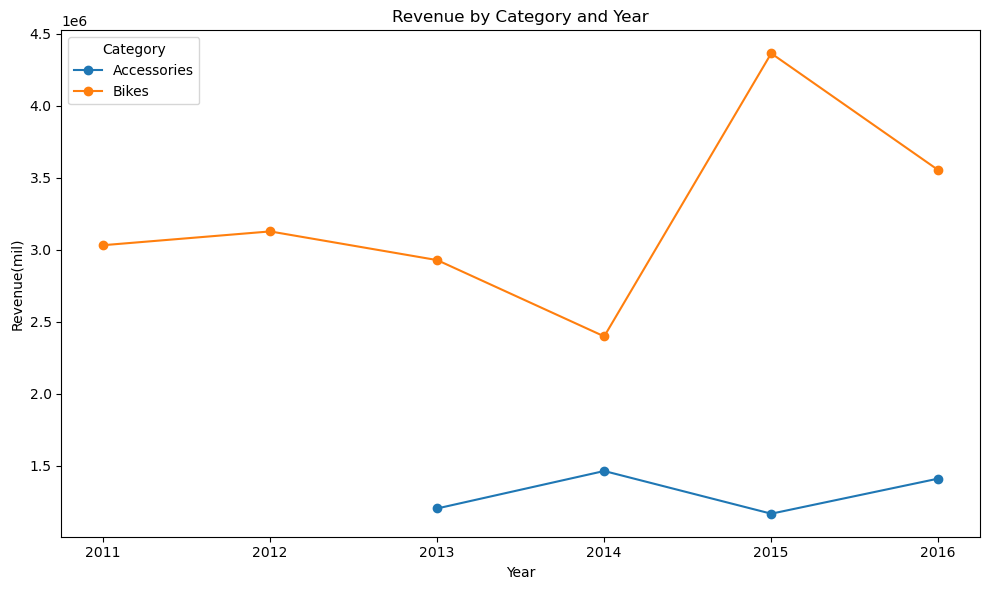

In [197]:
trend = df_usa.groupby(['Product_Category','Year'],as_index=False)['Revenue'].sum()

plt.figure(figsize=(10, 6))

for category in trend['Product_Category'].unique():
  
    multiline = trend[(trend['Product_Category'] == category)]
    
    plt.plot(multiline['Year'], multiline['Revenue'], marker='o', label=category)

plt.title('Revenue by Category and Year')
plt.xlabel('Year')
plt.ylabel('Revenue'+'(mil)')
plt.xticks(df_usa['Year'].unique())  

plt.legend(title='Category')

plt.grid(False)  
plt.tight_layout()
plt.show()


Penjualan produk pada kategory aksesoris pada 4 tahun yaitu dari tahun 2013 hingga 2016 mengalami pergerakan yang tidak signifikan, sedangkan untuk produk pada kategory bikes mengalami pergerakan signifikan dari tahun 2014 ke 2015 sebelum pada akhirnya mengalami penurunan performa ditahun setelahnya.

### 4.b memvisualiasikan berapa besar porsi pria dan wanita  dalam keseluruhan penjualan produk selama 2011-2016 dengan menggunakan pie-chart karena konteks yang digunakan tidak terlalu kompleks (hanya menggunakan 1 variable saja)

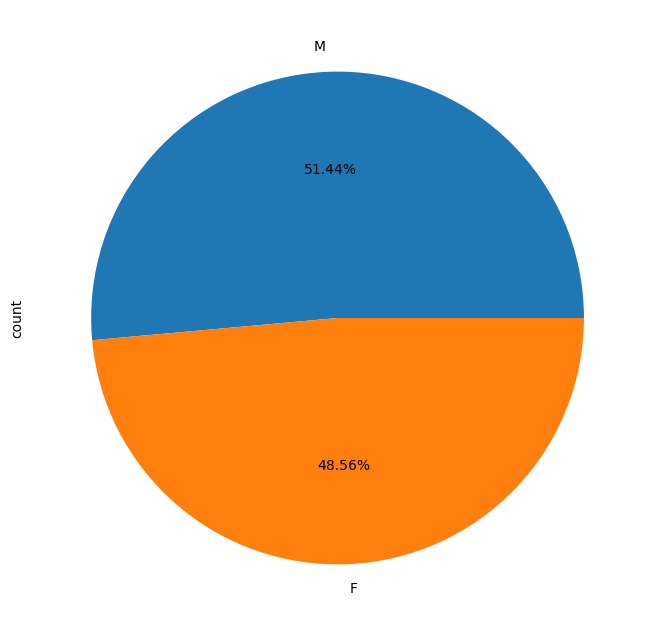

In [198]:
fig,ax1 = plt.subplots(figsize=(8,8))

df_usa['Customer_Gender'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

berdasarakan dari tahun penjualan 2011-2016 , secara kumulatif sebaran gender para pembelinya hampir imbang dikarenakan gender laki-laki yang sedikit lebih unggul dibanding konsumen perempuannya.

### 4.c memvisualisasikan produk teratas di tiap negara bagian berdasarkan revenuenya dengan bar-chart

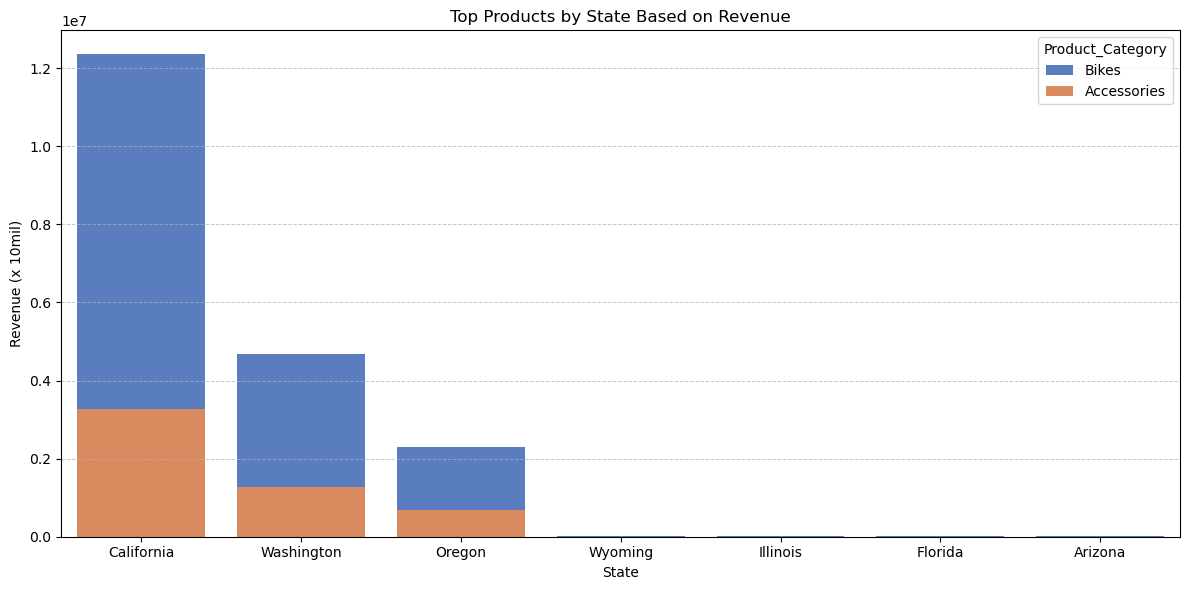

In [220]:
grouped = df_usa.groupby(['State', 'Product_Category'], as_index=False)['Revenue'].sum()

sorted = grouped.sort_values(by='Revenue',ascending=False)

top = sorted.head(10)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot using Seaborn
sns.barplot(data= top , x='State', y='Revenue', hue='Product_Category', dodge=False, palette='muted')

# Add title and labels
plt.title('Top Products by State Based on Revenue')
plt.xlabel('State')
plt.ylabel('Revenue (x 10mil)')

# Optional: Add grid for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### 4.d mengetahui berapa besar revenue tiap sub-categorynya selama  tahun penjualan dengan menggunakan bar-chart karna bentuknya yang kategorikal

C:\Users\alifn\AppData\Local\Temp\ipykernel_8880\2226783789.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=topqwe, x='Product', y='Revenue', palette='muted')


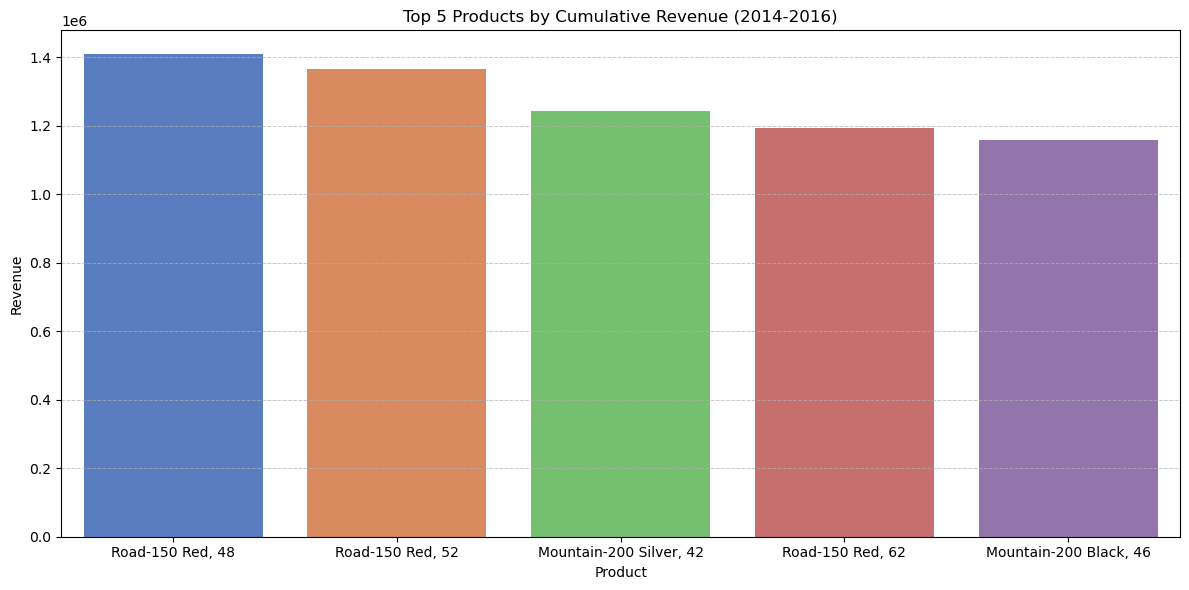

In [215]:
qwe = df_usa.groupby(['Sub_Category', 'Product'], as_index=False)['Revenue'].sum()

sortqwe = qwe.sort_values(by='Revenue',ascending=False)

topqwe = sortqwe.head(5)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot using Seaborn
sns.barplot(data=topqwe, x='Product', y='Revenue', palette='muted')

# Add title and labels
plt.title('Top 5 Products by Cumulative Revenue (2014-2016)')
plt.xlabel('Product')
plt.ylabel('Revenue')

# Optional: Add grid for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# 5. Kesimpulan

- setelah dilakukan loading data didapati bahwa data sudah clean dengan tidak terdapat nilai null-value, namun terdapat tidak kesesuaian tipedata pada salah satu kolomnya.Namun hal itu dihiraukan karena sudah ada representasinya pada kolom hari bulan dan tahun,sehingga kolom tersebut akan dihapus dari keseluruhan data. 
- Pada data awal cakupannya terlalu luas untuk dilakukan analisa yang spesifik, maka dari itu dilakukan filterisasi data berdasarkan negaranya yaitu yang terpilih adalah united state dan melakukan filter juga pada kategori produknya karena kategori clothing konteksnya terlalu jauh bila disandingkan dengan accessories dan bikes, dan terkumpulah kolom sebanyak 32706 baris dari total sebelumnya -+ 110000 baris , dan dari 32706 baris terdapat data yang terduplikasi sebanyak 364 baris dan langsung mengatasi hal tersebut dengan menghapusnya dan menyisakan satu sebagai nilai-unik. 


Setelah sudah selesai dengan proses cleaning lebih lanjut didapatkan bahwa Berdasarkan product category :

- rata-rata umur pembelinya adalah 37tahun dengan deviasi umur 0.7 tahun , dengan deviasi umur pada tiap product-categorynya accessories 11,6 th , bikes 10 th, dan clothing 11th. Nilai rata-rata revenue dari keseluruhan data pada tiap kategorynya bernilai mendekati nilai 2445 pada category bikes dan nilai 212 pada category accessories. 
- Data pada umur pembeli product mengindikasikan bahwa data mengalami sedikit skew kearah kanan dengan nilai rata-ratanya lebih besar dari nilai tengah pada data apabila dilakukan pengurutan data, berikut pula dengan sebaran nilai revenuenya bahwa datanya mengindikasikan ada skew kearah kanan apabila dilihat dari nilai dari tiap kategorynya. 
- Umur pembeli yang sering melakukan pembelian barang berkaitan dengan sepeda dan perlengkapannya adalah umur 32 tahun dan nilai pendapatan revenue yang per waktu transaksinya adalah sebanyak 2274

- diketahui bahwa sebaran data pada beberapa kolom yang akan dilakukan uji korelasi adalah tidak terdistribusi normal sehingga analisa lanjut banyak menggunakan metode yang diperuntukkan untuk data yang tidak terdistribusi normal. 
- pada perhitungan metode spearman pada saat perhitungan analisis deskriptif bahwa korelasi antara umur pembeli dengan revenue yang dihasilkan perusahaan dan beberapa produk kategori yang terjual memiliki hubungan yang sangat lemah walau korelasinya positif, mengindikasikan pada beberapa produk apabila pada umur tertentu memang spending amountnya pada beberapa kategori sejalan sama kenaikan revenuenya.
- selain dari itu korelasi antara umur pembeli dengan jenis produk kategori bikes(sepeda) berkorelasi kontradiktif atau negatif dan itupun kuat relasinya itu sangat lemah sama dengan yang lainnya.
- Pada menguji hipotesis apakah 'usia pelanggan memiliki pengaruh terhadap nilai pembelian sepeda di pasar Amerika Serikat.
didapati hasil & diketahui bahwa selain dari kategori accesories, kategori lainnya tersebut dipengaruhi nilai pembeliannya oleh umur dari calon konsumennya.
- pada uji hipotesis lainnya yang menyatakan bahwa "terdapat perbedaan signifikan dalam revenue atau jumlah pembelian (order quantity) antara pelanggan pria dan wanita? didapati hasil bahwa pada kedua product category rata-rata revenue terdapat perbedaan yang signifikan jika dikorelasikan dengan gender pembelinya.


## Rekomendasi:

- Berdasarkan perhitungan dan visualiasi diatas perusahaan dapat memfokuskan penjualannya pada kategory produk berbasiskan sepeda dilihat dari produk 5 teratas berdasarkan dari kalkukasi revenuenya pada tahun 2014-2016
- dengan diketahuinya bahwa 3 negara bagian memiliki penjualan yang besar dibanding negara bagian lainnya, maka perusahaan perlu menjaga kepuasan pelanggan di negara bagian tersebut, selagi menjajaki produknya pada negara bagian selain 3 negara bagian teratas berdasarkan kumulatif revenuenya.
- dengan mengetahui bahwa sebaran gender pembelinya hampir sama antara pria dan wanita, maka perusahaan perlu memastikan bahwa saat melakukan strategi pemasaran tidak condong kesalahsatunya, untuk memastikan keduanya tetap membeli produk dari perusahaan anda.
- berdasarkan hasil uji beberapa korelasi diatas nilai revenue tidak dipengaruhi oleh gender maupun umur sehingga memungkinkan ada faktor lain yang mempengaruhi naik atau turunnya nilai revenue dari tiap kategori produk, dan hal tersebut perlu dilakukan analisa lebih lanjut dengan data yang lebih lengkap.